# Midterm - Environmental & Health Impacts of Warehouses in Ontario, CA

## Research Question

Our project seeks to explore the relationship between warehouses and environmental, social, and health outcomes in the communities surrounding them in Ontario, California.

[Link to project proposal](https://github.com/rg-al/UP221-cargo/blob/main/Project%20Materials/ProjectPrososal.ipynb)

## Data Sources

[Environmental Justice Index](https://onemap.cdc.gov/portal/apps/sites/#/eji-explorer)(EJI)

The EJI is a newer index administered by the CDC that provides information on what communities experience severe cumulative impacts from environmental burden. This dataset provides environmental, social, and health data that we use to identify the causes of vulnerability for the communities in Ontario. Selected indicators from this dataset can be overlaid with warehouse data to identify a link between the growth of warehouses in the area and environmental justice burdens.

[Warehouse CITY data](https://radicalresearch.shinyapps.io/WarehouseCITY/)

The Warehouse CITY (communitY Cumulative Impact Tool) data data currently contains information on assessor parcel number, year built, and type. This data is collected with the purpose of providing a tool to help communities in Southern California understand and quantify the cumulative impacts of warehouses in the region. 

[California State Geoportal](https://gis.data.ca.gov/)

This dataset provides access to various geospatial data and services related to the state of California, including data on topography, demographics, land use, natural resources, and other related topics. We downloaded geojson files of Ontario city’s schools, parks, the airport, or any public places to see their locations and how warehouses may possibly impact people using these facilities.

## Data exploration

Exploring basic information of all the data of EJI, warehouses, and related facilities of Ontario city.  

In [2]:
#importing the neccesary libraries

import pandas as pd
import geopandas as gpd
import plotly as plt
import folium 
import matplotlib.pyplot as mplt
import contextily as ctx
from shapely import wkt
import plotly.express as px
import osmnx as ox

### Environmental and Health Data Exploration
---
#### Loading Environmental Justice Index data

In [3]:
# Importing EJI file

EJI =gpd.read_file('../Data/EJI/EJISanBernardino.geojson')
EJI.head()

objectid statefp countyfp tractce              affgeoid        geoid  name  \
0      8839      06      071  000103  1400000US06071000103  06071000103  1.03   
1      8840      06      071  000104  1400000US06071000104  06071000104  1.04   
2      8841      06      071  000105  1400000US06071000105  06071000105  1.05   
3      8842      06      071  000107  1400000US06071000107  06071000107  1.07   
4      8843      06      071  000108  1400000US06071000108  06071000108  1.08   

           county stateabbr statedesc  ... ep_mhlth  ep_diabetes  epl_bphigh  \
0  San Bernardino        CA   Califor  ...     10.2          9.3      0.0768   
1  San Bernardino        CA   Califor  ...      9.3         10.1      0.0857   
2  San Bernardino        CA   Califor  ...      9.2          9.4      0.0573   
3  San Bernardino        CA   Califor  ...     10.5          8.9      0.1459   
4  San Bernardino        CA   Califor  ...     11.0          8.8      0.0557   

   epl_asthma  epl_cancer  epl_diabetes  epl_mhlth  SHAPE__Length  \
0      0.0604      0.0995        0.3190     0.0990    8127.024758   
1      0.0273      0.1118        0.4209     0.0457   11165.267251   
2      0.0220      0.0785        0.3319     0.0411   10508.687958   
3      0.1389      0.3472        0.2668     0.1216    5494.762999   
4      0.1594      0.1118        0.2542     0.1672    8095.601501   

    SHAPE__Area                                           geometry  
0  2.848611e+06  POLYGON ((-1977959.45880 -161657.81960, -19780...  
1  4.125057e+06  POLYGON ((-1978420.45090 -163718.68370, -19786...  
2  5.775186e+06  POLYGON ((-1977854.62430 -164883.70570, -19777...  
3  1.406656e+06  POLYGON ((-1975678.77440 -166054.16440, -19757...  
4  2.866269e+06  POLYGON ((-1978003.58100 -168118.08840, -19780...  

[5 rows x 122 columns]

In [4]:
# Setting the crs to epsg:4326
EJI.crs = 'epsg:4326'

#### Loading Ontario Census Tract Data

In [5]:
#Since the "0" in the beginning of fips code will be eliminated, we convert them from "int" to "str". 
# Convert the datatypes of 'STATEFP','COUNTYFP',and 'GEOID''COUNTYFP' from "int" to "str".

censustracts =pd.read_csv('ontario.csv', 
            dtype= 
            {
        'STATEFP':str,
        'COUNTYFP':str,
        'GEOID': str
            })
censustracts.head()

Unnamed: 0 STATEFP COUNTYFP  TRACTCE              AFFGEOID        GEOID  \
0         435      06      071     1307  1400000US06071001307  06071001307   
1         436      06      071     1703  1400000US06071001703  06071001703   
2         437      06      071     1812  1400000US06071001812  06071001812   
3         717      06      071     1002  1400000US06071001002  06071001002   
4         718      06      071     1310  1400000US06071001310  06071001310   

    NAME LSAD    ALAND  AWATER  \
0  13.07   CT  1281879       0   
1  17.03   CT  1909759       0   
2  18.12   CT   888388       0   
3  10.02   CT  1203162       0   
4  13.10   CT  1417244       0   

                                            geometry  
0  POLYGON ((-117.628575 34.09215, -117.628563 34...  
1  POLYGON ((-117.667639 34.03029, -117.667599 34...  
2  POLYGON ((-117.65077 34.049248999999996, -117....  
3  POLYGON ((-117.680818 34.074059999999996, -117...  
4  POLYGON ((-117.64145500000001 34.0870819999999...

#### Setting the 'geometry' column as a geometry data type

In [6]:
# Checking the data types
censustracts.dtypes

Unnamed: 0      int64
STATEFP        object
COUNTYFP       object
TRACTCE         int64
AFFGEOID       object
GEOID          object
NAME          float64
LSAD           object
ALAND           int64
AWATER          int64
geometry       object
dtype: object

In [7]:
# import library to convert the datatype

from shapely.wkt import loads
censustracts.geometry =  censustracts['geometry'].apply(loads)

In [8]:
censustracts=censustracts.set_geometry('geometry')

In [9]:
# Check the datatypes again

censustracts.dtypes

Unnamed: 0       int64
STATEFP         object
COUNTYFP        object
TRACTCE          int64
AFFGEOID        object
GEOID           object
NAME           float64
LSAD            object
ALAND            int64
AWATER           int64
geometry      geometry
dtype: object

#### Right join to merge the two datasets

We have health and environmental data in dataframe EJI, and geometry data in dataframe censustracts. So we merged the two dataframes for further analysis.    

In [10]:
# Merge 'EJI' and 'censustracts' based on 'geoid' and 'GEOID'.  

EJIdata=pd.merge(EJI, censustracts, how='right',indicator=True, left_on='geoid', right_on='GEOID')
EJIdata

objectid statefp countyfp tractce              affgeoid        geoid  \
0       8895      06      071  001307  1400000US06071001307  06071001307   
1       8907      06      071  001703  1400000US06071001703  06071001703   
2       8917      06      071  001812  1400000US06071001812  06071001812   
3       8889      06      071  001002  1400000US06071001002  06071001002   
4       8898      06      071  001310  1400000US06071001310  06071001310   
5       8903      06      071  001503  1400000US06071001503  06071001503   
6       8910      06      071  001707  1400000US06071001707  06071001707   
7       8916      06      071  001810  1400000US06071001810  06071001810   
8       8890      06      071  001101  1400000US06071001101  06071001101   
9       8896      06      071  001308  1400000US06071001308  06071001308   
10      8914      06      071  001808  1400000US06071001808  06071001808   
11      8858      06      071  000304  1400000US06071000304  06071000304   
12      8892      06      071  001104  1400000US06071001104  06071001104   
13      8897      06      071  001309  1400000US06071001309  06071001309   
14      8902      06      071  001501  1400000US06071001501  06071001501   
15      8909      06      071  001706  1400000US06071001706  06071001706   
16      8920      06      071  001903  1400000US06071001903  06071001903   
17      8921      06      071  001905  1400000US06071001905  06071001905   
18      8915      06      071  001809  1400000US06071001809  06071001809   
19      9202      06      071  012700  1400000US06071012700  06071012700   
20      8891      06      071  001103  1400000US06071001103  06071001103   
21      8893      06      071  001200  1400000US06071001200  06071001200   
22      8894      06      071  001305  1400000US06071001305  06071001305   
23      8901      06      071  001400  1400000US06071001400  06071001400   
24      8904      06      071  001504  1400000US06071001504  06071001504   
25      8908      06      071  001704  1400000US06071001704  06071001704   
26      8913      06      071  001806  1400000US06071001806  06071001806   
27      8900      06      071  001312  1400000US06071001312  06071001312   
28      8912      06      071  001804  1400000US06071001804  06071001804   
29      8953      06      071  002206  1400000US06071002206  06071002206   
30      8911      06      071  001803  1400000US06071001803  06071001803   
31      8865      06      071  000603  1400000US06071000603  06071000603   
32      8906      06      071  001702  1400000US06071001702  06071001702   
33      8918      06      071  001813  1400000US06071001813  06071001813   
34      8888      06      071  001001  1400000US06071001001  06071001001   
35      8905      06      071  001600  1400000US06071001600  06071001600   
36      8922      06      071  001906  1400000US06071001906  06071001906   
37      8950      06      071  002109  1400000US06071002109  06071002109   

     name          county stateabbr statedesc  ... COUNTYFP  TRACTCE  \
0   13.07  San Bernardino        CA   Califor  ...      071     1307   
1   17.03  San Bernardino        CA   Califor  ...      071     1703   
2   18.12  San Bernardino        CA   Califor  ...      071     1812   
3   10.02  San Bernardino        CA   Califor  ...      071     1002   
4   13.10  San Bernardino        CA   Califor  ...      071     1310   
5   15.03  San Bernardino        CA   Califor  ...      071     1503   
6   17.07  San Bernardino        CA   Califor  ...      071     1707   
7   18.10  San Bernardino        CA   Califor  ...      071     1810   
8   11.01  San Bernardino        CA   Califor  ...      071     1101   
9   13.08  San Bernardino        CA   Califor  ...      071     1308   
10  18.08  San Bernardino        CA   Califor  ...      071     1808   
11   3.04  San Bernardino        CA   Califor  ...      071      304   
12  11.04  San Bernardino        CA   Califor  ...      071     1104   
13  13.09  San Bernardino      

In [11]:
#list of column names 
list(EJIdata)

['objectid',
 'statefp',
 'countyfp',
 'tractce',
 'affgeoid',
 'geoid',
 'name',
 'county',
 'stateabbr',
 'statedesc',
 'location',
 'e_totpop',
 'm_totpop',
 'e_daypop',
 'spl_eji',
 'rpl_eji',
 'spl_ser',
 'rpl_ser',
 'epl_ozone',
 'epl_pm',
 'epl_dslpm',
 'epl_totcr',
 'spl_ebm_theme1',
 'rpl_ebm_dom1',
 'epl_npl',
 'epl_tri',
 'epl_tsd',
 'epl_rmp',
 'epl_coal',
 'epl_lead',
 'spl_ebm_theme2',
 'rpl_ebm_dom2',
 'epl_park',
 'epl_houage',
 'epl_wlkind',
 'spl_ebm_theme3',
 'rpl_ebm_dom3',
 'epl_rail',
 'epl_road',
 'epl_airprt',
 'spl_ebm_theme4',
 'rpl_ebm_dom4',
 'epl_impwtr',
 'spl_ebm_theme5',
 'rpl_ebm_dom5',
 'spl_ebm',
 'rpl_ebm',
 'epl_minrty',
 'spl_svm_dom1',
 'rpl_svm_dom1',
 'epl_pov200',
 'epl_nohsdp',
 'epl_unemp',
 'epl_renter',
 'epl_houbdn',
 'epl_uninsur',
 'epl_noint',
 'spl_svm_dom2',
 'rpl_svm_dom2',
 'epl_age65',
 'epl_age17',
 'epl_disabl',
 'epl_limeng',
 'spl_svm_dom3',
 'rpl_svm_dom3',
 'epl_mobile',
 'epl_groupq',
 'spl_svm_dom4',
 'rpl_svm_dom4',
 'spl_

#### Adding a filter to keep only the data we need for the analysis

In [12]:
# Create a list of columns we want to keep. 

columns_to_keep2 = ['statefp',
                   'countyfp',
                   'affgeoid',
                   'geoid',
                   'county',
                   'location',
                   'e_totpop',
                   'e_daypop',
                   'rpl_eji',
                   'rpl_ser',
                   #environmental variable
                   'epl_ozone',
                   'epl_pm',
                   'epl_dslpm',
                   'epl_totcr',
                    #built environment
                   'epl_park',
                   'epl_wlkind',
                   #transportation
                   'epl_rail',
                   'epl_road',
                   'epl_airprt',
                   'rpl_ebm_dom4',
                   # social vulnerability
                    'rpl_svm',
                    'spl_svm',
                    #health
                    'ep_bphigh',
                     'ep_asthma',
                     'ep_cancer',
                     'ep_mhlth',
                     'ep_diabetes',
                     'epl_bphigh',
                     'epl_asthma',
                     'epl_cancer',
                     'epl_diabetes',
                     'epl_mhlth',
                #geometric data  
                  'SHAPE__Length',
                 'SHAPE__Area',
                    'geometry_x',
                  'geometry_y'
                  ]
# create new dataframe with the selected columns
EJIdata3 = EJIdata[columns_to_keep2]

# print first 5 rows of the columns kept
EJIdata3.head()

statefp countyfp              affgeoid        geoid          county  \
0      06      071  1400000US06071001307  06071001307  San Bernardino   
1      06      071  1400000US06071001703  06071001703  San Bernardino   
2      06      071  1400000US06071001812  06071001812  San Bernardino   
3      06      071  1400000US06071001002  06071001002  San Bernardino   
4      06      071  1400000US06071001310  06071001310  San Bernardino   

                                           location  e_totpop  e_daypop  \
0  Census Tract 13.07, San Bernardino County, Calif      4212      2345   
1  Census Tract 17.03, San Bernardino County, Calif      5680      2388   
2  Census Tract 18.12, San Bernardino County, Calif      3477      2913   
3  Census Tract 10.02, San Bernardino County, Calif      5929      1960   
4  Census Tract 13.10, San Bernardino County, Calif      6193      2689   

   rpl_eji  rpl_ser  ...  ep_diabetes  epl_bphigh  epl_asthma  epl_cancer  \
0   0.6649   0.8834  ...         11.8      0.1419      0.3966      0.0881   
1   0.4366   0.6255  ...         10.8      0.1893      0.3389      0.1785   
2   0.9054   0.9883  ...         13.7      0.2437      0.5157      0.0785   
3   0.6587   0.7748  ...         11.3      0.1349      0.4859      0.0400   
4   0.7382   0.9542  ...         12.0      0.2437      0.3679      0.1641   

   epl_diabetes  epl_mhlth  SHAPE__Length   SHAPE__Area  \
0        0.6264     0.5495    4784.119192  1.282029e+06   
1        0.5105     0.3970    5575.388721  1.908278e+06   
2        0.7878     0.6957    4243.720821  8.871496e+05   
3        0.5716     0.6859    4410.506266  1.202110e+06   
4        0.6463     0.4797    5320.830383  1.414418e+06   

                                          geometry_x  \
0  POLYGON ((-1963807.20900 -157069.92780, -19639...   
1  POLYGON ((-1968855.23160 -162996.94260, -19689...   
2  POLYGON ((-1966870.45630 -161282.11530, -19670...   
3  POLYGON ((-1969106.41240 -158735.28010, -19691...   
4  POLYGON ((-1965084.27710 -157355.52200, -19652...   

                                          geometry_y  
0  POLYGON ((-117.62857 34.09215, -117.62856 34.0...  
1  POLYGON ((-117.66764 34.03029, -117.66760 34.0...  
2  POLYGON ((-117.65077 34.04925, -117.65074 34.0...  
3  POLYGON ((-117.68082 34.07406, -117.68082 34.0...  
4  POLYGON ((-117.64146 34.08708, -117.64144 34.0...  

[5 rows x 36 columns]

#### Renaming columns

In [13]:
#listing the column names for version 2 for ease when renaming the columns
columns = list(EJIdata3) 
columns

['statefp',
 'countyfp',
 'affgeoid',
 'geoid',
 'county',
 'location',
 'e_totpop',
 'e_daypop',
 'rpl_eji',
 'rpl_ser',
 'epl_ozone',
 'epl_pm',
 'epl_dslpm',
 'epl_totcr',
 'epl_park',
 'epl_wlkind',
 'epl_rail',
 'epl_road',
 'epl_airprt',
 'rpl_ebm_dom4',
 'rpl_svm',
 'spl_svm',
 'ep_bphigh',
 'ep_asthma',
 'ep_cancer',
 'ep_mhlth',
 'ep_diabetes',
 'epl_bphigh',
 'epl_asthma',
 'epl_cancer',
 'epl_diabetes',
 'epl_mhlth',
 'SHAPE__Length',
 'SHAPE__Area',
 'geometry_x',
 'geometry_y']

In [14]:
# Renaming the columns listed above 

EJIdata3.columns = ['state code',
'county code',
'affgeoid',
'geoid',
'county',
'location',
'total population',
 'day population',
 'EJI rank',
 'Environmental burden rank',
#environmental variable
 'Ozone rank',
 'PM 2.5 rank',
 'Diesel rank',
 'Air toxics cancer risk',
#built environment
 'Lack of parks',
 'Lack of walkability',
 #transportation
 'railways',
 'high volume roads',
 'airports',
 'proximity to roads, rail, airports',
# social vulnerability
 'social vulnerability sum',
 'social vulnerability rank',
#health
 '% high blood pressure',
 '% asthma',
 '% cancer',
 '% mental health',
 '% diabetes',
 'high blood pressure rank',
 'asthma rank',
 'cancer rank',
 'diabetes rank',
 'mental health rank',
 #geometric data 
 'SHAPE__Length',
 'SHAPE__Area',
 'geometry_x',
 'geometry'
]

# printing a sample of the data with the new column names
EJIdata3.sample(5)

state code county code              affgeoid        geoid          county  \
7          06         071  1400000US06071001810  06071001810  San Bernardino   
29         06         071  1400000US06071002206  06071002206  San Bernardino   
35         06         071  1400000US06071001600  06071001600  San Bernardino   
0          06         071  1400000US06071001307  06071001307  San Bernardino   
2          06         071  1400000US06071001812  06071001812  San Bernardino   

                                            location  total population  \
7   Census Tract 18.10, San Bernardino County, Calif              5273   
29  Census Tract 22.06, San Bernardino County, Calif              7293   
35  Census Tract 16, San Bernardino County, Californ              5363   
0   Census Tract 13.07, San Bernardino County, Calif              4212   
2   Census Tract 18.12, San Bernardino County, Calif              3477   

    day population  EJI rank  Environmental burden rank  ...  % diabetes  \
7             1537    0.6583                     0.8768  ...        11.7   
29            3438    0.5286                     0.7347  ...         8.8   
35           13675    0.9576                     0.9914  ...        14.9   
0             2345    0.6649                     0.8834  ...        11.8   
2             2913    0.9054                     0.9883  ...        13.7   

    high blood pressure rank  asthma rank  cancer rank  diabetes rank  \
7                     0.1213       0.4568       0.0528         0.6162   
29                    0.0671       0.2306       0.0785         0.2542   
35                    0.2282       0.7373       0.0302         0.8547   
0                     0.1419       0.3966       0.0881         0.6264   
2                     0.2437       0.5157       0.0785         0.7878   

    mental health rank  SHAPE__Length   SHAPE__Area  \
7               0.5944    4068.275074  9.885362e+05   
29              0.2588    5587.702549  2.007920e+06   
35              0.9135   24243.890617  1.243162e+07   
0               0.5495    4784.119192  1.282029e+06   
2               0.6957    4243.720821  8.871496e+05   

                                           geometry_x  \
7   POLYGON ((-1967251.91030 -162961.07030, -19673...   
29  POLYGON ((-1962202.90840 -164512.99230, -19624...   
35  POLYGON ((-1969288.09910 -159503.62050, -19693...   
0   POLYGON ((-1963807.20900 -157069.92780, -19639...   
2   POLYGON ((-1966870.45630 -161282.11530, -19670...   

                                             geometry  
7   POLYGON ((-117.65071 34.03745, -117.65069 34.0...  
29  POLYGON ((-117.59320 34.03051, -117.59316 34.0...  
35  POLYGON ((-117.68086 34.05986, -117.68084 34.0...  
0   POLYGON ((-117.62857 34.09215, -117.62856 34.0...  
2   POLYGON ((-117.65077 34.04925, -117.65074 34.0...  

[5 rows x 36 columns]

#### Preparing the data for mapping

In [15]:
# Set 'EJIdata3' crs to 'epsg:4326'  

EJIdata3=EJIdata3.set_geometry('geometry')
EJIdata3.crs = 'epsg:4326'

In [16]:
EJIdata3 = EJIdata3.to_crs(epsg=4326)
print(EJIdata3.crs)
EJIdata3.head()

epsg:4326


state code county code              affgeoid        geoid          county  \
0         06         071  1400000US06071001307  06071001307  San Bernardino   
1         06         071  1400000US06071001703  06071001703  San Bernardino   
2         06         071  1400000US06071001812  06071001812  San Bernardino   
3         06         071  1400000US06071001002  06071001002  San Bernardino   
4         06         071  1400000US06071001310  06071001310  San Bernardino   

                                           location  total population  \
0  Census Tract 13.07, San Bernardino County, Calif              4212   
1  Census Tract 17.03, San Bernardino County, Calif              5680   
2  Census Tract 18.12, San Bernardino County, Calif              3477   
3  Census Tract 10.02, San Bernardino County, Calif              5929   
4  Census Tract 13.10, San Bernardino County, Calif              6193   

   day population  EJI rank  Environmental burden rank  ...  % diabetes  \
0            2345    0.6649                     0.8834  ...        11.8   
1            2388    0.4366                     0.6255  ...        10.8   
2            2913    0.9054                     0.9883  ...        13.7   
3            1960    0.6587                     0.7748  ...        11.3   
4            2689    0.7382                     0.9542  ...        12.0   

   high blood pressure rank  asthma rank  cancer rank  diabetes rank  \
0                    0.1419       0.3966       0.0881         0.6264   
1                    0.1893       0.3389       0.1785         0.5105   
2                    0.2437       0.5157       0.0785         0.7878   
3                    0.1349       0.4859       0.0400         0.5716   
4                    0.2437       0.3679       0.1641         0.6463   

   mental health rank  SHAPE__Length   SHAPE__Area  \
0              0.5495    4784.119192  1.282029e+06   
1              0.3970    5575.388721  1.908278e+06   
2              0.6957    4243.720821  8.871496e+05   
3              0.6859    4410.506266  1.202110e+06   
4              0.4797    5320.830383  1.414418e+06   

                                          geometry_x  \
0  POLYGON ((-1963807.20900 -157069.92780, -19639...   
1  POLYGON ((-1968855.23160 -162996.94260, -19689...   
2  POLYGON ((-1966870.45630 -161282.11530, -19670...   
3  POLYGON ((-1969106.41240 -158735.28010, -19691...   
4  POLYGON ((-1965084.27710 -157355.52200, -19652...   

                                            geometry  
0  POLYGON ((-117.62857 34.09215, -117.62856 34.0...  
1  POLYGON ((-117.66764 34.03029, -117.66760 34.0...  
2  POLYGON ((-117.65077 34.04925, -117.65074 34.0...  
3  POLYGON ((-117.68082 34.07406, -117.68082 34.0...  
4  POLYGON ((-117.64146 34.08708, -117.64144 34.0...  

[5 rows x 36 columns]

In [17]:
EJIdata3.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 38 entries, 0 to 37
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   state code                          38 non-null     object  
 1   county code                         38 non-null     object  
 2   affgeoid                            38 non-null     object  
 3   geoid                               38 non-null     object  
 4   county                              38 non-null     object  
 5   location                            38 non-null     object  
 6   total population                    38 non-null     int64   
 7   day population                      38 non-null     int64   
 8   EJI rank                            38 non-null     float64 
 9   Environmental burden rank           38 non-null     float64 
 10  Ozone rank                          38 non-null     float64 
 11  PM 2.5 rank               

### Ontario Land Use Data Exploration


In [16]:
#defining the area of interest with an address
address = 'Ontario International Airport, Vineyard Avenue, Racimo, Ontario, San Bernardino County, California, 91761, United States'

In [17]:
#obtaining building data from OSM for the entire city
osm = ox.geometries_from_address(address,tags={'building':True},dist=5000)

In [18]:
#getting more info on the dataset
#determining hoow many rows/columns
osm.shape
#this dataset has 8264 rows and 133 columns

(3119, 130)

In [19]:
#determining datatype
type(osm)

geopandas.geodataframe.GeoDataFrame

In [20]:
#displaying 10 random rows
osm.sample(10)

addr:state    building  ele gnis:county_name  \
element_type osmid                                                    
way          828901439        NaN         yes  NaN              NaN   
             46141577         NaN         yes  NaN              NaN   
             993191498        NaN         yes  NaN              NaN   
             736377748        NaN         yes  NaN              NaN   
             740853782        NaN         yes  NaN              NaN   
             741782513        NaN         yes  NaN              NaN   
             993191510        NaN         yes  NaN              NaN   
             892118178        NaN         yes  NaN              NaN   
             736694765        NaN       house  NaN              NaN   
             972659395        NaN  industrial  NaN              NaN   

                       gnis:feature_id gnis:reviewed name source  \
element_type osmid                                                 
way          828901439             NaN           NaN  NaN    NaN   
             46141577              NaN           NaN  NaN    NaN   
             993191498             NaN           NaN  NaN    NaN   
             736377748             NaN           NaN  NaN    NaN   
             740853782             NaN           NaN  NaN    NaN   
             741782513             NaN           NaN  NaN    NaN   
             993191510             NaN           NaN  NaN    NaN   
             892118178             NaN           NaN  NaN    NaN   
             736694765             NaN           NaN  NaN    NaN   
             972659395             NaN           NaN  NaN    NaN   

                                                                 geometry  \
element_type osmid                                                          
way          828901439  POLYGON ((-117.56014 34.08756, -117.55959 34.0...   
             46141577   POLYGON ((-117.56025 34.07636, -117.56026 34.0...   
             993191498  POLYGON ((-117.59678 34.09898, -117.59678 34.0...   
             736377748  POLYGON ((-117.60208 34.03120, -117.60208 34.0...   
             740853782  POLYGON ((-117.65230 34.06231, -117.65213 34.0...   
             741782513  POLYGON ((-117.63116 34.07778, -117.63116 34.0...   
             993191510  POLYGON ((-117.59406 34.09653, -117.59406 34.0...   
             892118178  POLYGON ((-117.56969 34.09580, -117.56921 34.0...   
             736694765  POLYGON ((-117.64389 34.02162, -117.64373 34.0...   
             972659395  POLYGON ((-117.58675 34.09064, -117.58641 34.0...   

                       addr:city  ... content generator:method  \
element_type osmid                ...                            
way          828901439       NaN  ...     NaN              NaN   
             46141577        NaN  ...     NaN              NaN   
             993191498       NaN  ...     NaN              NaN   
             736377748       NaN  ...     NaN              NaN   
             740853782       NaN  ...     NaN              NaN   
             741782513       NaN  ...     NaN              NaN   
             993191510       NaN  ...     NaN              NaN   
             892118178       NaN  ...     NaN              NaN   
             736694765       NaN  ...     NaN              NaN   
             972659395       NaN  ...     NaN              NaN   

                       generator:output:electricity generator:source  \
element_type osmid                                                     
way          828901439                          NaN              NaN   
             46141577                           NaN              NaN   
             993191498                          NaN              NaN   
             736377748                          NaN              NaN   
             740853782                          NaN              NaN   
             741782513                          NaN              NaN   
             993191510                          NaN        

In [21]:
#exploring column categories in order to find out what columns should be eliminated
osm.info(verbose=True,show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 3119 entries, ('node', 368173617) to ('relation', 15511540)
Data columns (total 130 columns):
 #    Column                          Non-Null Count  Dtype   
---   ------                          --------------  -----   
 0    addr:state                      334 non-null    object  
 1    building                        3119 non-null   object  
 2    ele                             8 non-null      object  
 3    gnis:county_name                3 non-null      object  
 4    gnis:feature_id                 9 non-null      object  
 5    gnis:reviewed                   3 non-null      object  
 6    name                            280 non-null    object  
 7    source                          432 non-null    object  
 8    geometry                        3119 non-null   geometry
 9    addr:city                       349 non-null    object  
 10   addr:housenumber                361 non-null    object  
 11   addr:street            

In [22]:
#subsetting the data and defining which columns to keep
ctk=['geometry','building']
osm=osm[ctk]
osm.head(10)

geometry building
element_type osmid                                          
node         368173617  POINT (-117.65043 34.09696)      yes
             479791356  POINT (-117.54560 34.08149)      yes
             479791359  POINT (-117.54563 34.08115)      yes
             479791362  POINT (-117.54570 34.08083)      yes
             518277168  POINT (-117.57604 34.08489)      yes
             518277169  POINT (-117.57537 34.08804)      yes
             518277174  POINT (-117.57559 34.09250)      yes
             518277175  POINT (-117.57559 34.09311)      yes
             518277177  POINT (-117.57559 34.09358)      yes
             518277178  POINT (-117.57560 34.09416)      yes

'ctk' dataframe has been subset to 'element_type', 'osmid', 'geometry', and 'building'

#### Warehouse Data Exploration

In [23]:
#loading first data file on warehouse information
wh = pd.read_csv('../weekly tasks/week 4/W4-Georgie/warehouse (1).csv')

wh.head()

Assessor parcel number Building classification  Year built  Acres  \
0              051513138        storage building        2021    275   
1              046323158  distribution warehouse        2003    225   
2              049202124       storage warehouse        2016    151   
3              668280017   warehouse/dry storage        1910    128   
4              046323161  distribution warehouse        2018    106   

   Building sq.ft.  
0          7778022  
1          6381893  
2          4273702  
3          3633789  
4          3014158

In [24]:
#Trying to find average acreage per warehouse
wh['Acres'].mean()

5.871236928277173

In [25]:
#finding the median
wh['Acres'].median()

3.0

In [26]:
#generating statistics for acreage
wh['Acres'].describe()

count    9467.000000
mean        5.871237
std         9.138117
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max       275.000000
Name: Acres, dtype: float64

In [27]:
#sorting warehouses by acreage size
wh.sort_values(by='Acres', ascending=False)
wh.head()

Assessor parcel number Building classification  Year built  Acres  \
0              051513138        storage building        2021    275   
1              046323158  distribution warehouse        2003    225   
2              049202124       storage warehouse        2016    151   
3              668280017   warehouse/dry storage        1910    128   
4              046323161  distribution warehouse        2018    106   

   Building sq.ft.  
0          7778022  
1          6381893  
2          4273702  
3          3633789  
4          3014158

In [28]:
#sorting warehouses by year built
wh.sort_values(by='Year built', ascending=True)
wh.head()

Assessor parcel number Building classification  Year built  Acres  \
0              051513138        storage building        2021    275   
1              046323158  distribution warehouse        2003    225   
2              049202124       storage warehouse        2016    151   
3              668280017   warehouse/dry storage        1910    128   
4              046323161  distribution warehouse        2018    106   

   Building sq.ft.  
0          7778022  
1          6381893  
2          4273702  
3          3633789  
4          3014158

In [29]:
#removing 1910 value (which is used to indicate unknown warehouse construction date
wh.drop(wh.loc[wh['Year built']==1910].index, inplace=True)

In [30]:
#checking for empty values
wh.columns[wh.isna().all()].tolist()

[]

In [31]:
#filtering out unwanted columns
desired_columns=['Acres','Year built', 'Building sq.ft.']

In [32]:
#creating a copy so that the table doesn't revert to the original data
wh_new=wh[desired_columns].copy()
wh_new.head()

Acres  Year built  Building sq.ft.
0    275        2021          7778022
1    225        2003          6381893
2    151        2016          4273702
4    106        2018          3014158
5    106        1941          2990190

The dataframe of warehouses have been cleaned up to only information of acres, year built, and building sq.ft.

## Analysis

#### Bring in Warehouse data

In [33]:
# See all the columns and rows.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Import warehouse data and convert the datatype of 'Assessor parcel number' and 'Building classification' from 'int' or 'float' to 'str'
             
Warehouses = pd.read_csv('../weekly tasks/week 4/Warehouse Data Exploration - Matthews/Data/Warehouse_Data.csv',
        dtype=
        {
            'Assessor parcel number':str,
            'Building classification':str,
        }
)

San_Bern_Parcels = gpd.read_file('../weekly tasks/week 4/Warehouse Data Exploration - Matthews/Data/Ontario Parcels/SBCo_Parcel_Polygons.shp')

San_Bern_Parcels.rename(columns = {'ParcelNumb':'Assessor parcel number'}, inplace = True)

#merge the warehouses and parcel shapefile on the San Bernandino County Tax Assessor parcel Number
Warehouse_Parcel=Warehouses.merge(San_Bern_Parcels,on="Assessor parcel number")
Warehouse_Parcel_Geo = gpd.GeoDataFrame(Warehouse_Parcel, geometry='geometry', crs="EPSG:4326")

### Charts

#### Simple bar chart with plot

Charts for environmental data

In [34]:
# Subset the EJ variables to only fips code and air pollution  

EJIdata2_pollution = EJIdata3[['geoid','Ozone rank', 'PM 2.5 rank', 'Diesel rank','Air toxics cancer risk']]
EJIdata2_pollution.head()
EJIdata2_pollution.sort_values(by='PM 2.5 rank', ascending=False).head(5)

geoid  Ozone rank  PM 2.5 rank  Diesel rank  Air toxics cancer risk
16  06071001903      0.9865       0.9955       0.7307                  0.8310
36  06071001906      0.9935       0.9955       0.8541                  0.8709
17  06071001905      0.9894       0.9953       0.8064                  0.8851
29  06071002206      0.9938       0.9948       0.8882                  0.9165
18  06071001809      0.9930       0.9947       0.8919                  0.9207

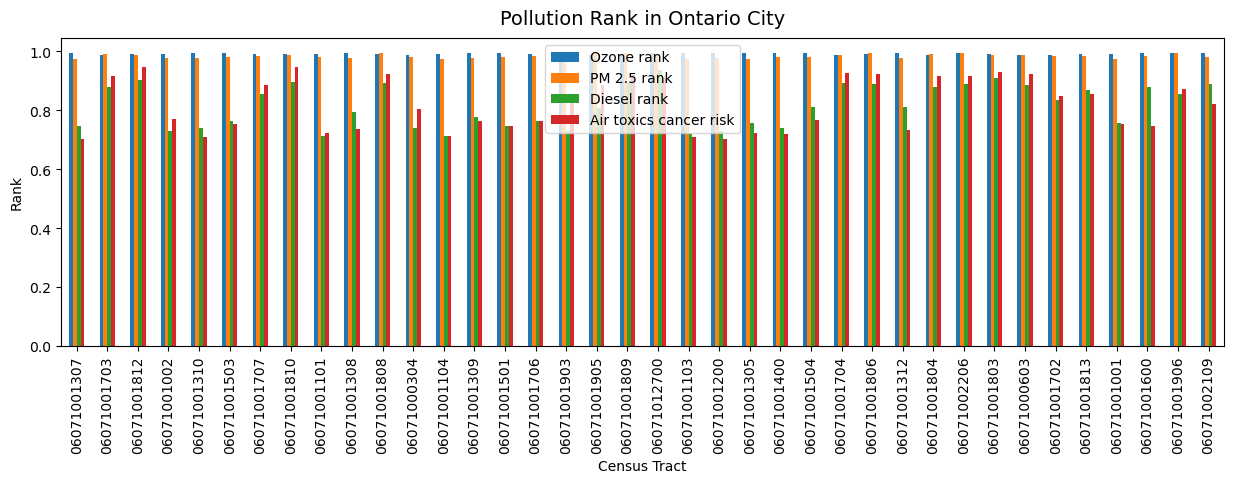

In [35]:
# Create bar chart of all air pollution 
fig, ax = mplt.subplots(figsize=(15,4))

EJIdata2_pollution.plot.bar(ax=ax,
                                      x='geoid',
                                      legend=True,
                                      )
ax.set_xlabel('Census Tract') # override x label
ax.set_ylabel('Rank') # override y label
ax.set_title("Pollution Rank in Ontario City",fontsize=14,pad=10); # multi-line title with padding

A static bar chart demonstrating all air pollution rank of each census tract in Ontario city.

<AxesSubplot: xlabel='geoid'>

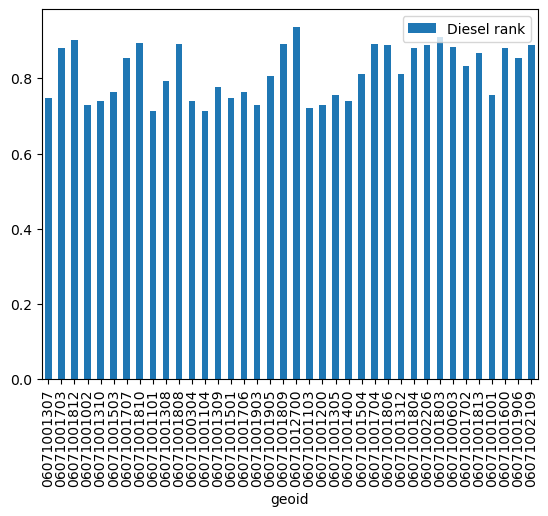

In [36]:
# Create bar chart of diesel rank

EJIdata3_diesel = EJIdata3[['geoid','Diesel rank']]
EJIdata3_diesel.plot.bar(x='geoid')

The bar chart does not look good. Let's create a better one!

#### Interactive bar chart with plotly
Environmental data

In [37]:
# Subset dataframe and sort it 
# keep only fips code and diesel rank

EJIdata3_diesel.sort_values(by='Diesel rank', ascending=False, inplace = True)
EJIdata3_diesel.head()

/tmp/ipykernel_895/3062379244.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EJIdata3_diesel.sort_values(by='Diesel rank', ascending=False, inplace = True)


geoid  Diesel rank
19  06071012700       0.9367
30  06071001803       0.9109
2   06071001812       0.9018
7   06071001810       0.8955
10  06071001808       0.8919

/opt/conda/lib/python3.10/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



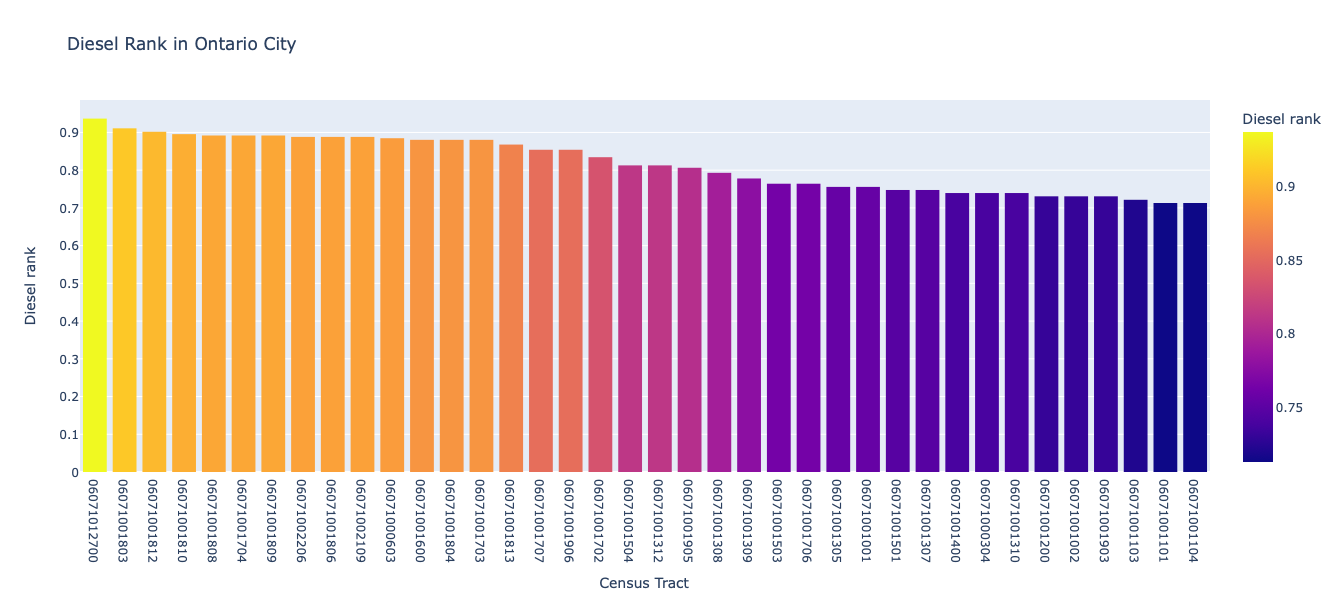

In [38]:
# Create interactive bar chart

# for interactive plots
import plotly.express as px

# add labels by providing a dict
fig = px.bar(
        EJIdata3_diesel,
        x='geoid',
        y='Diesel rank',
        color = 'Diesel rank',
        title='Diesel Rank in Ontario City',
        labels={
            'geoid':'Census Tract',       
        },
        height=600
)

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

Now we have a prettier and interactive bar chart which is easier to identify the diesel rank of all census tracts in Ontario city.  

#### Pie chart - Land Use Data

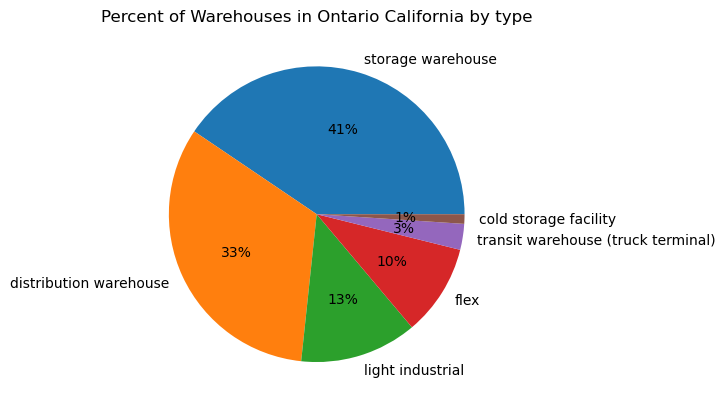

In [39]:
# Creating pie chart of warehouse types in Ontario
Warehouse_Parcel_count = Warehouse_Parcel['Building classification'].value_counts()
ax = Warehouse_Parcel_count.plot(kind='pie',title='Percent of Warehouses in Ontario California by type',autopct='%1.0f%%')
ax.get_yaxis().set_visible(False)

A pie chart showing the percentage of warehouse types in Ontario city. 

#### Bar chart - Land use data

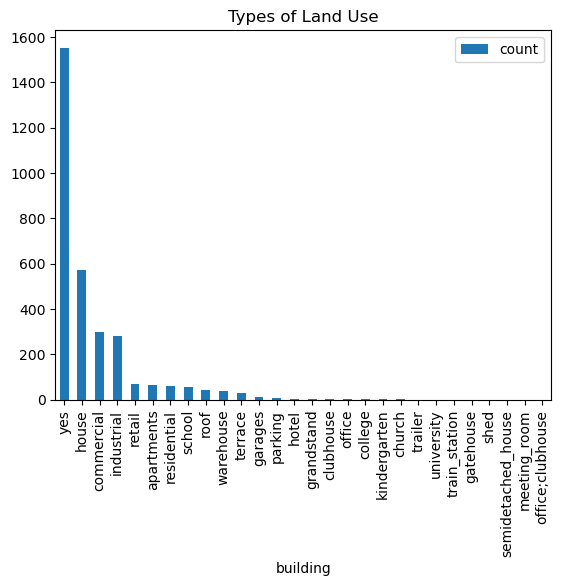

In [40]:
# Count the numbers of each building type.
osm_build_count=osm.value_counts(['building']).reset_index(name="count")
osm_build_count

#Visualizing the data through a bar chart
osm_build_count.plot.bar(x='building', title= 'Types of Land Use');

A bar chart showing the counts of each building type.

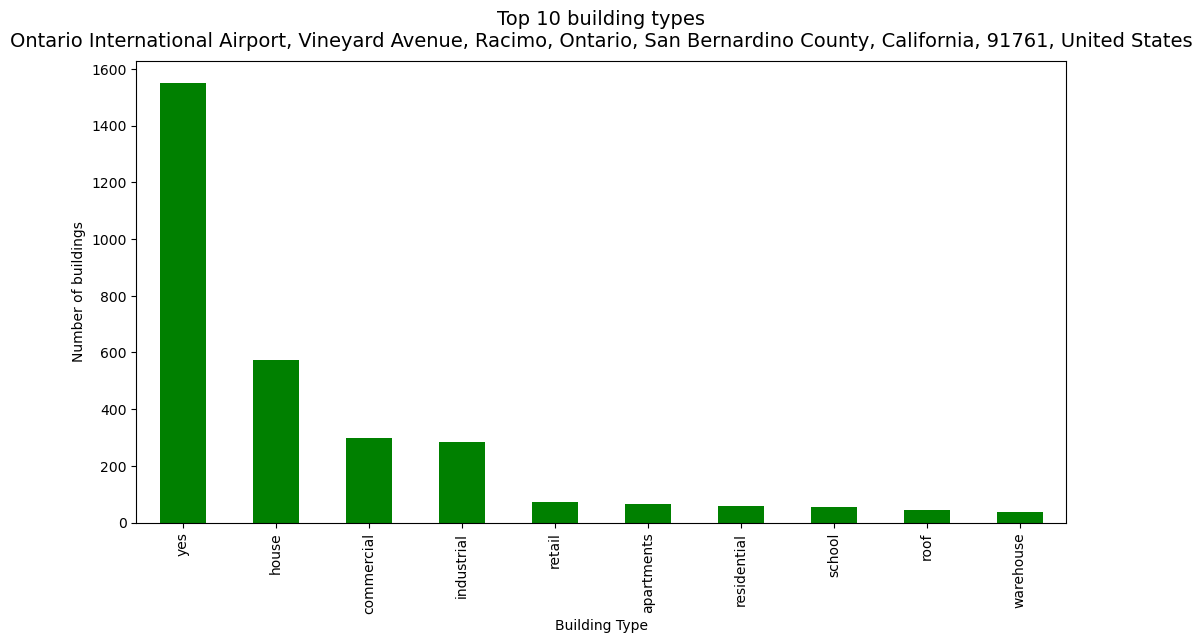

In [41]:
#creating another, more readable chart
fig, ax = mplt.subplots(figsize=(12,6))

osm_build_count[:10].plot.bar(ax=ax,
                                      x='building',
                                      y='count',
                                      legend=False,
                                      color='green'
                                      )
ax.set_xlabel('Building Type') # override x label
ax.set_ylabel('Number of buildings') # override y label
ax.set_title("Top 10 building types\n"+address,fontsize=14,pad=10); # multi-line title with padding

Adding title, labels of axis, and adjusting the width to make it more readable. 

/opt/conda/lib/python3.10/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



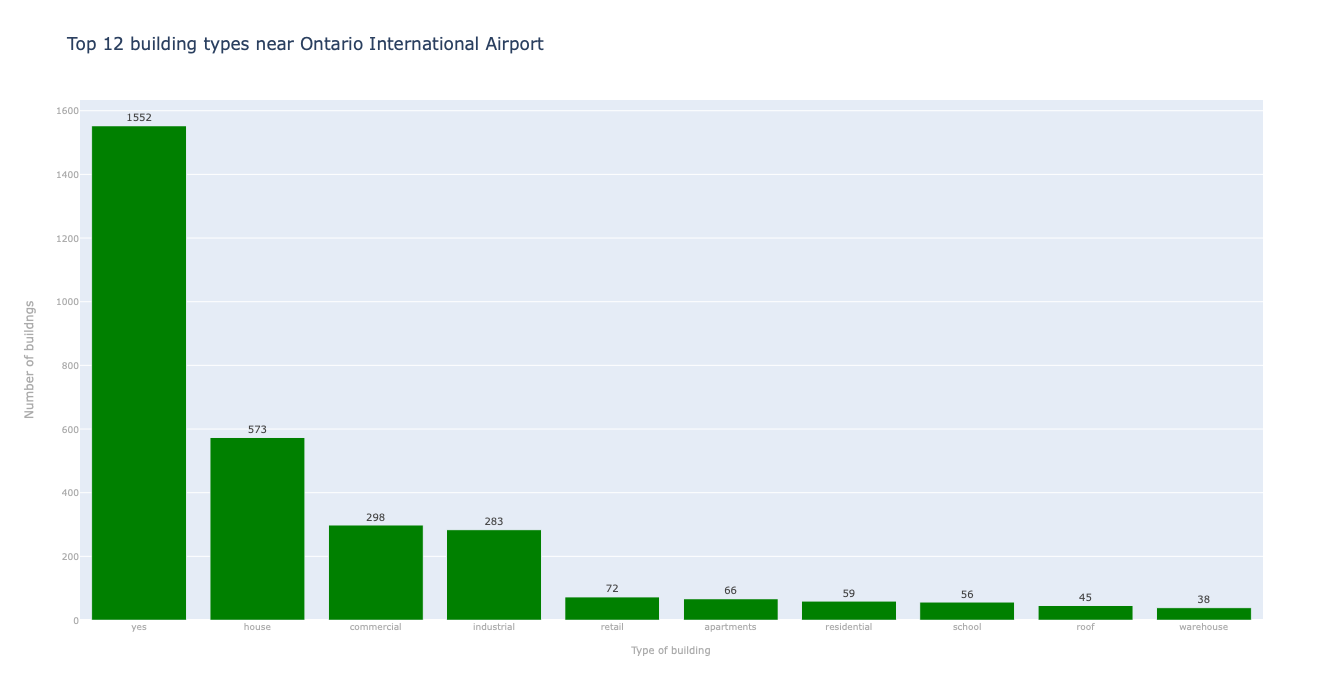

In [42]:
# creating a plotly graph
fig = px.bar(osm_build_count.head(10),
        x='building',
        y='count',
        title="Top 12 building types near Ontario International Airport", 
        text_auto = True,
        height=700,
        width=900,
        color_discrete_sequence =['green']*len(osm_build_count),
        labels={
                'count': 'Number of buildngs',
                'building': 'Type of building',
        })

# labeling the bar
fig.update_traces(textposition='outside',textfont_size=10,textfont_color='#444')

# labeling the axes
fig.update_yaxes(title_font_size=12,title_font_color='#aaa',tickfont_color='#aaa',tickfont_size=9)
fig.update_xaxes(title_font_size=10,title_font_color='#aaa',tickfont_color='#aaa',tickfont_size=9)

# show the figure
fig.show()

An interactive bar chart showing the counts of all building types.

#### Interactive Bar Chart - Warehouses over time

/opt/conda/lib/python3.10/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



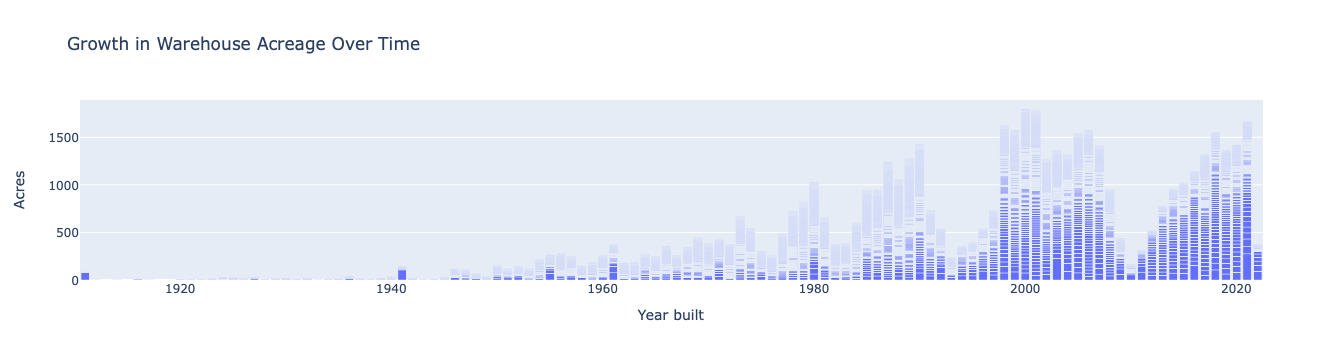

In [43]:
#use plotly to show how the the acreage per warehouse has increased over time
fig = px.bar(wh_new,
             x='Year built',
             y='Acres',
             title ='Growth in Warehouse Acreage Over Time'
            )
fig.show()

An interactive stacked bar chart showing the acres built in years. We can see that the size of each warehouse tend to be bigger in recent decades.  

/opt/conda/lib/python3.10/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



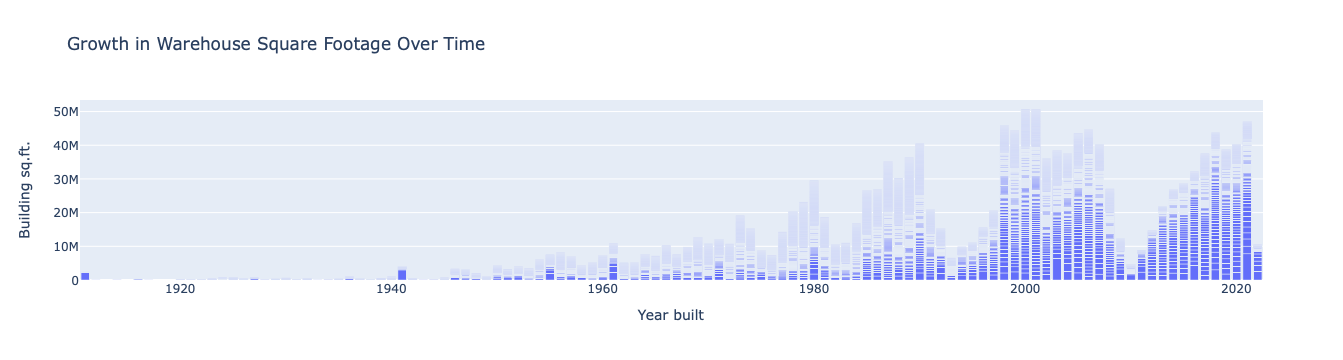

In [44]:
#trying to use plotly to show how the the acreage per warehouse has increased over time
fig = px.bar(wh_new,
             x='Year built',
             y='Building sq.ft.',
             title ='Growth in Warehouse Square Footage Over Time'
            )
fig.show()

An interactive stacked bar chart showing the building sq.ft of each warehouse in years. We can see that the total sq.ft.of each warehouse tend to be bigger in recent decades.

### Maps

#### Environmental & Health Data Maps

In [ ]:
# using a loop to create the maps

variables = ['total population',
 'day population',
 'EJI rank',
 'Environmental burden rank',
 'PM 2.5 rank',
 'Diesel rank',
 'Air toxics cancer risk',
 'Lack of parks',
 'Lack of walkability',
 'railways',
 'high volume roads',
 'airports',
 'proximity to roads, rail, airports',
 'social vulnerability rank',
 '% high blood pressure',
 '% asthma',
 '% cancer',
 '% mental health',
 '% diabetes',
 'high blood pressure rank',
 'asthma rank',
 'cancer rank',
 'diabetes rank',
 'mental health rank']

# Loop the variables
for variable in variables:
    ax = EJIdata3.plot(column=variable, edgecolor="white", legend=True)
    Warehouse_Parcel_Geo.centroid.plot(ax=ax, color='red',markersize=2);
    ax.set_title(variable)
    ax.set_axis_off()
    ctx.add_basemap(ax, crs=4326)

/tmp/ipykernel_895/566229731.py:31: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/tmp/ipykernel_895/566229731.py:31: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/tmp/ipykernel_895/566229731.py:31: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/tmp/ipykernel_895/566229731.py:31: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


/tmp/ipykernel_895/566229731.py:31: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' a

Now we have the static maps of all health, air pollution, and some EJ variables that showing their ranks and relationships with warehouses.   

#### Creating an Interactive Map of Desiel emisions in Ontario

Often times, its useful for urban planners to see the spatial relationships between infrastructture, ammentieies, and environmental conditions. To do this, we can use the Folium library along with our census tract data to create an interactive map. For this project, we would like to see the spatial relation between desiel emisions, the airport, public parks, and schools. Let's start by bringing in all our necessary data and python libraries.

In [ ]:
# See all the columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Import the file and convert the datatypes
EJIdata3=pd.read_csv('../Data/EJI Variables and Warehouse Marked.csv')
EJIdata3['geometry'] = EJIdata3['geometry'].apply(wkt.loads)
EJIdata3 = gpd.GeoDataFrame(EJIdata3, geometry='geometry', crs="EPSG:4326")
airports=gpd.read_file('../Data/Airport_Schools_Parks_Location/Airport_Boundaries_Ontario.geojson')
parks=gpd.read_file('../Data/Airport_Schools_Parks_Location/CPAD_Shapes/CPAD_2022b_Holdings.shp')
schools=gpd.read_file('../Data/Airport_Schools_Parks_Location/California_Schools_2021-22_San Berdarnido.geojson')


Warehouses = pd.read_csv('../weekly tasks/week 4/Warehouse Data Exploration - Matthews/Data/Warehouse_Data.csv',
        dtype=
        {
            'Assessor parcel number':str,
            'Building classification':str,
        }
)

San_Bern_Parcels = gpd.read_file('../weekly tasks/week 4/Warehouse Data Exploration - Matthews/Data/Ontario Parcels/SBCo_Parcel_Polygons.shp')

San_Bern_Parcels.rename(columns = {'ParcelNumb':'Assessor parcel number'}, inplace = True)

#merge the warehouses and parcel shapefile on the San Bernandino County Tax Assessor parcel Number
Warehouse_Parcel=Warehouses.merge(San_Bern_Parcels,on="Assessor parcel number")
Warehouse_Parcel_Geo = gpd.GeoDataFrame(Warehouse_Parcel, geometry='geometry', crs="EPSG:4326")

Now using Folium, we can begin to explore the data that we have. We have to reproject the parks files as well, to keep in the system projection system as the other data.

In [ ]:
schools=schools[schools['City']=='Ontario'];

parks.to_crs(epsg=4326, inplace=True);
parks1=parks[parks['CITY']=='Ontario'];
parks1["geometry"] = parks1["geometry"].centroid

In [ ]:
#start our map
m = folium.Map(location=[34.0633,-117.6509], 
               zoom_start = 11.5,
               tiles='CartoDB positron', 
               attribution='CartoDB')

# plot chorpleth over the base map
folium.Choropleth(
                  geo_data=EJIdata3, # geo data
                  data=EJIdata3, # data          
                  key_on='feature.properties.geoid', # key, or merge column
                  columns=['geoid','Diesel rank'], # [key, value]
                  fill_color='BuPu',
                  line_weight=0.3, 
                  fill_opacity=0.6,
                  line_opacity=0.8, # line opacity (of the border)
                  legend_name='Diesel Emission Percentile Rank').add_to(m)    # name on the legend color bar
#Add the Airport in Red
folium.Marker([34.05627, -117.59574], popup='<i>Ontario Airport</i>', icon=folium.Icon(color="red")).add_to(m)

#Add the Schools in Blue
for index, row in schools.iterrows():
    # add folium marker code
    folium.Marker([row.geometry.y, row.geometry.x], popup=row.SchoolName, tooltip=row.SchoolName).add_to(m)
    
# Add the Parks in Green
for index, row in parks1.iterrows():
    # add folium marker code
    folium.Marker([row.geometry.y, row.geometry.x], popup=row.SITE_NAME, tooltip=row.SITE_NAME, icon=folium.Icon(color="green")).add_to(m)
    # add folium marker code
m

#### Land Uses Maps/Plots
Create a map to visualize the building land use in Ontario city.

In [ ]:
# Plot the osm dataframe, whichs contain the building types and geometry information

osm.plot(figsize=(10,10))

In [ ]:
#removing unwanted building types using .loc
osm.drop(osm.loc[osm['building']=='trailer'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='church'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='clubhouse'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='garages'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='office;clubhouse'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='office'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='parking'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='college'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='gatehouse'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='hotel'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='roof'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='terrace'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='shed'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='meeting_room'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='grandstand'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='semidetached_house'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='train_station'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='kindergarten'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='commercial'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='apartments'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='retail'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='school'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='university'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='residential'].index,inplace=True)
osm.drop(osm.loc[osm['building']=='house'].index,inplace=True)

In [ ]:
#trying to color code the buildings
osm.plot(figsize=(10,10),
         column='building',
         cmap='tab20',
         legend=True)

In [ ]:
#using Web Mercator
osm_wm=osm.to_crs(epsg=3857)

In [ ]:
#adding a basemap
fig,ax=plt.subplots(figsize=(10,10))
osm_wm.plot(ax=ax,
            column='building',
            cmap='tab20',
            legend=True,
            alpha=0.8,
           )

ax.axis('off');

ctx.add_basemap(ax=ax,
                source=ctx.providers.Stamen.TonerLite,
                alpha=1
               )

We can see the density and shape of the buildings. 

## Team

**Alejandra Rios**: Repo manager, data collection and cleaning, assist with quantitative analysis, literature review

**Georgie Suico**: Qualitative analysis and literature review, assist with notebook design, quantitative analysis, and data collection

**Jennifer Chu**: Notebook and presentation design, assist with quantitative analysis, literature review, and data collection

**Matthews Cribioli**: Quantitative analysis, assist with qualitative analysis, literature review, and data collection